# Guide

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dmplot import MultiPlot, PlotFunctions

## Using the preset plot functions

Modifying the figure after the subplots are created can be done by pulling the axes from the function

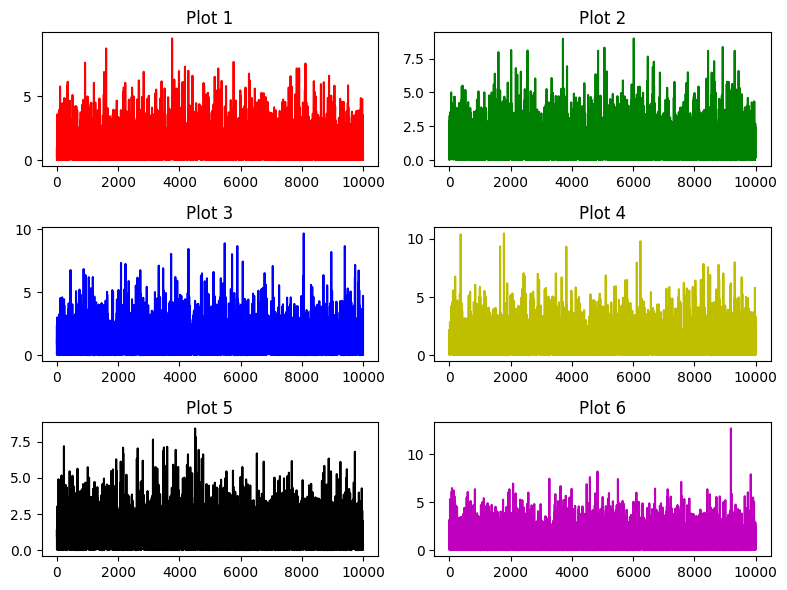

In [2]:
n = 6
dataset = [np.random.standard_exponential(10_000) for _ in range(n)]
mp = MultiPlot(dataset, perfect_shape=True, figsize=(8, 6))
fig, axes = mp.dynamic_plot(PlotFunctions.plot)

colors = "rgbykm"
[line.set_color(colors[i]) for i, ax in enumerate(axes) for line in ax.get_lines()]

plt.tight_layout()
plt.show()

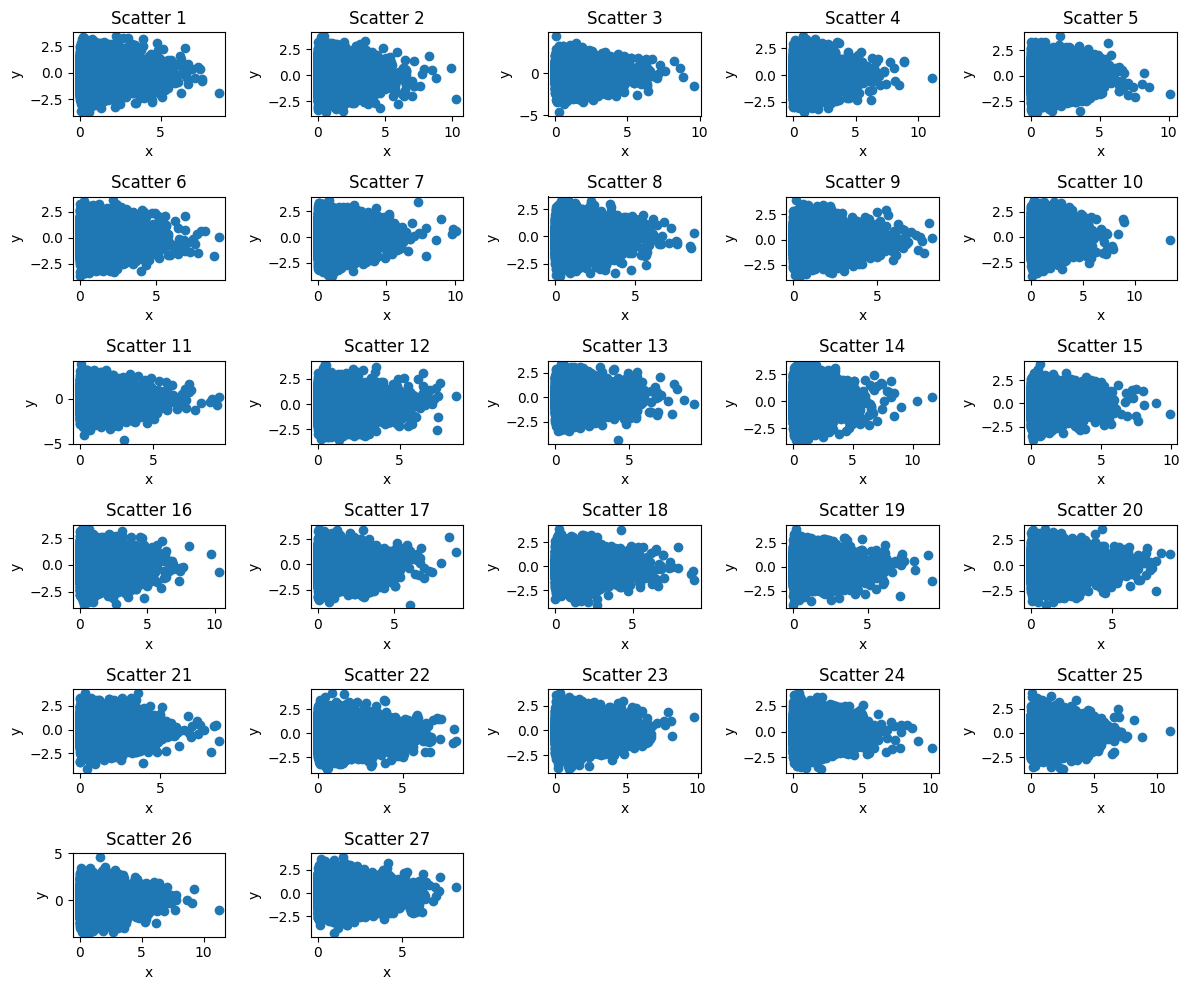

In [3]:
n = 27
dataset = {
    f"Scatter {i + 1}": [
        np.random.standard_exponential(10_000),
        np.random.standard_normal(10_000)
    ]
    for i in range(n)
}

mp = MultiPlot(dataset, shape=(5, 6), figsize=(12, 10))
fig, axes = mp.dynamic_plot(PlotFunctions.scatterplot)
[ax.set_xlabel("x") for ax in axes]
[ax.set_ylabel("y") for ax in axes]

plt.tight_layout()
plt.show()

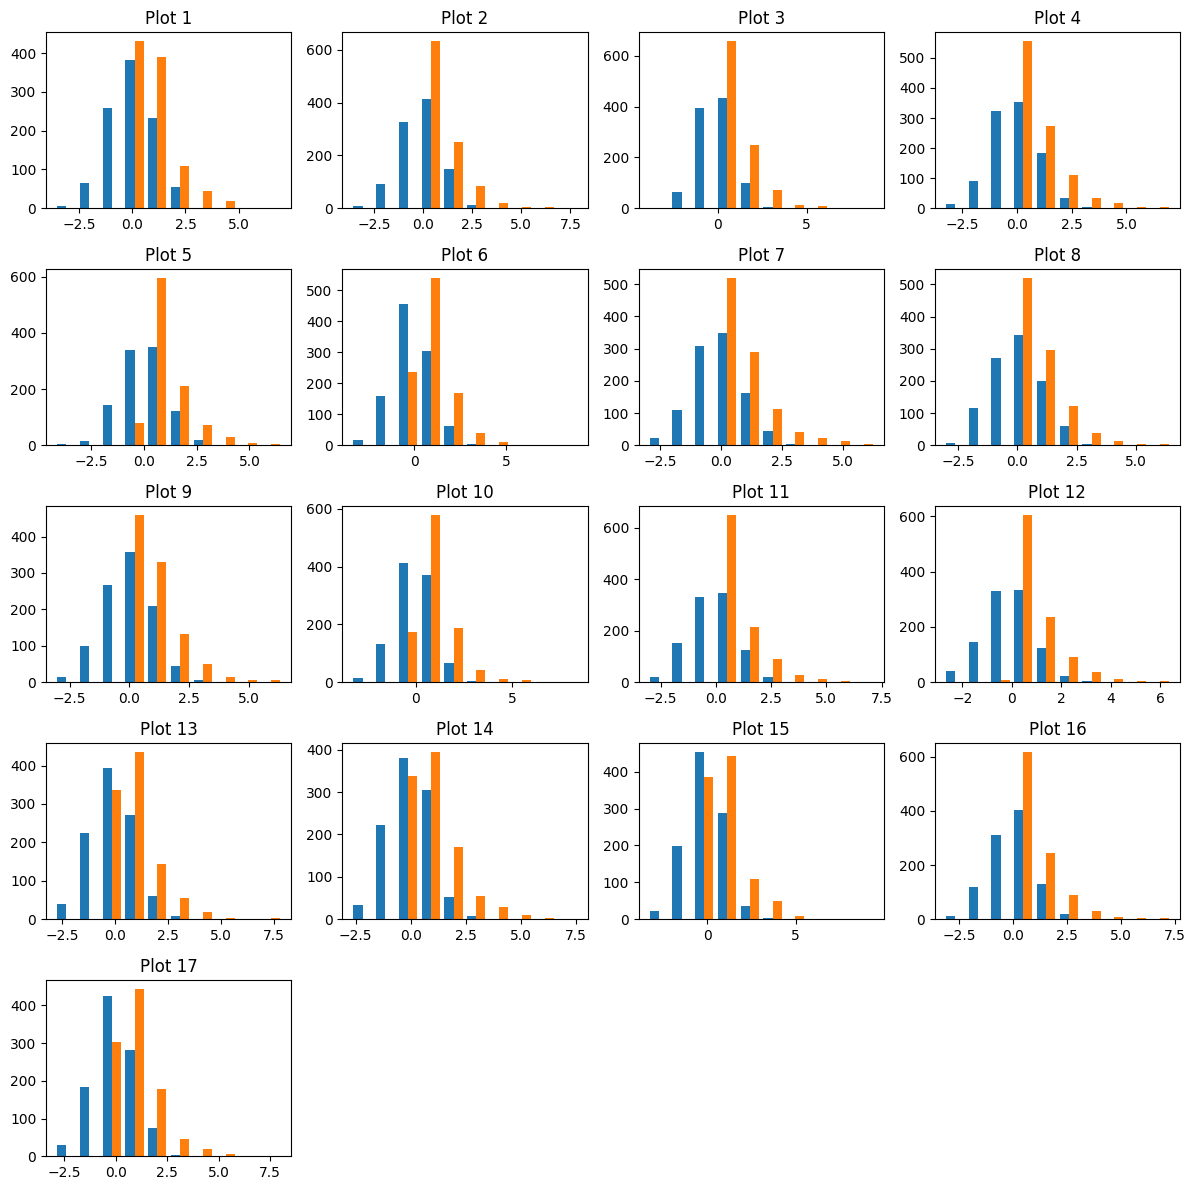

In [4]:
n = 17

dataset = [
    [
        np.random.standard_normal(1_000),
        np.random.standard_exponential(1_000)
    ]
    for _ in range(n)
]

mp = MultiPlot(dataset, square_shape=True, figsize=(12, 12))
mp.dynamic_plot(PlotFunctions.histplot)

plt.tight_layout()
plt.show()

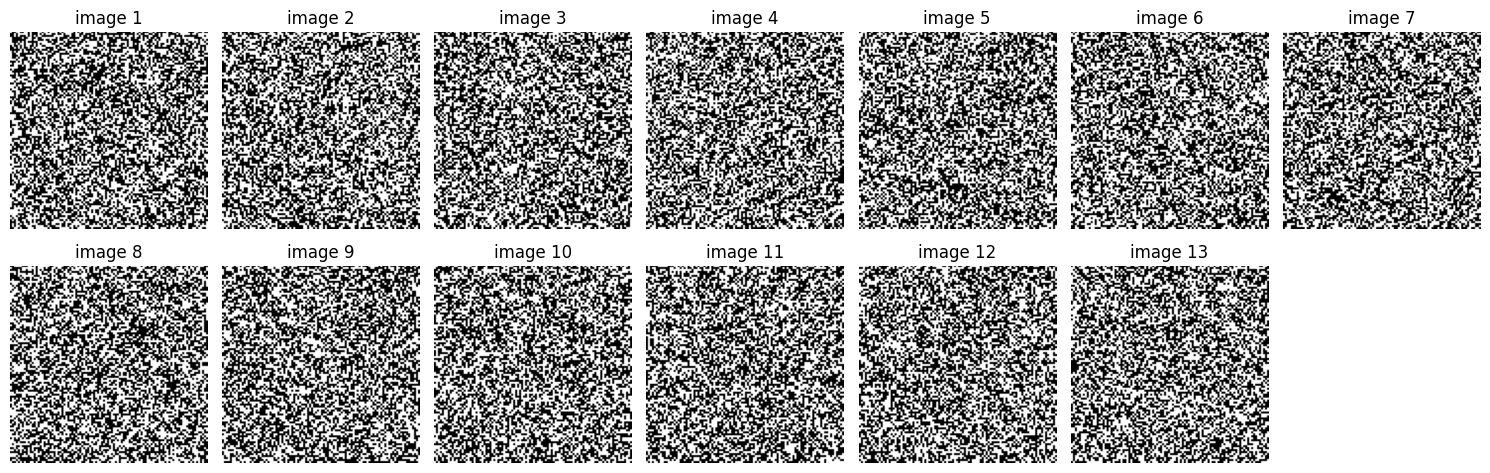

In [5]:
n = 13

dataset = {f"image {i + 1}": np.random.choice([0, 1], size=(100, 100)) for i in range(n) }
mp = MultiPlot(dataset, shape=(7, 2), long=False, figsize=(15, 5))
fig, axes = mp.dynamic_plot(PlotFunctions.imshow)

[ax.axis("off") for ax in axes]
plt.tight_layout()
plt.show()

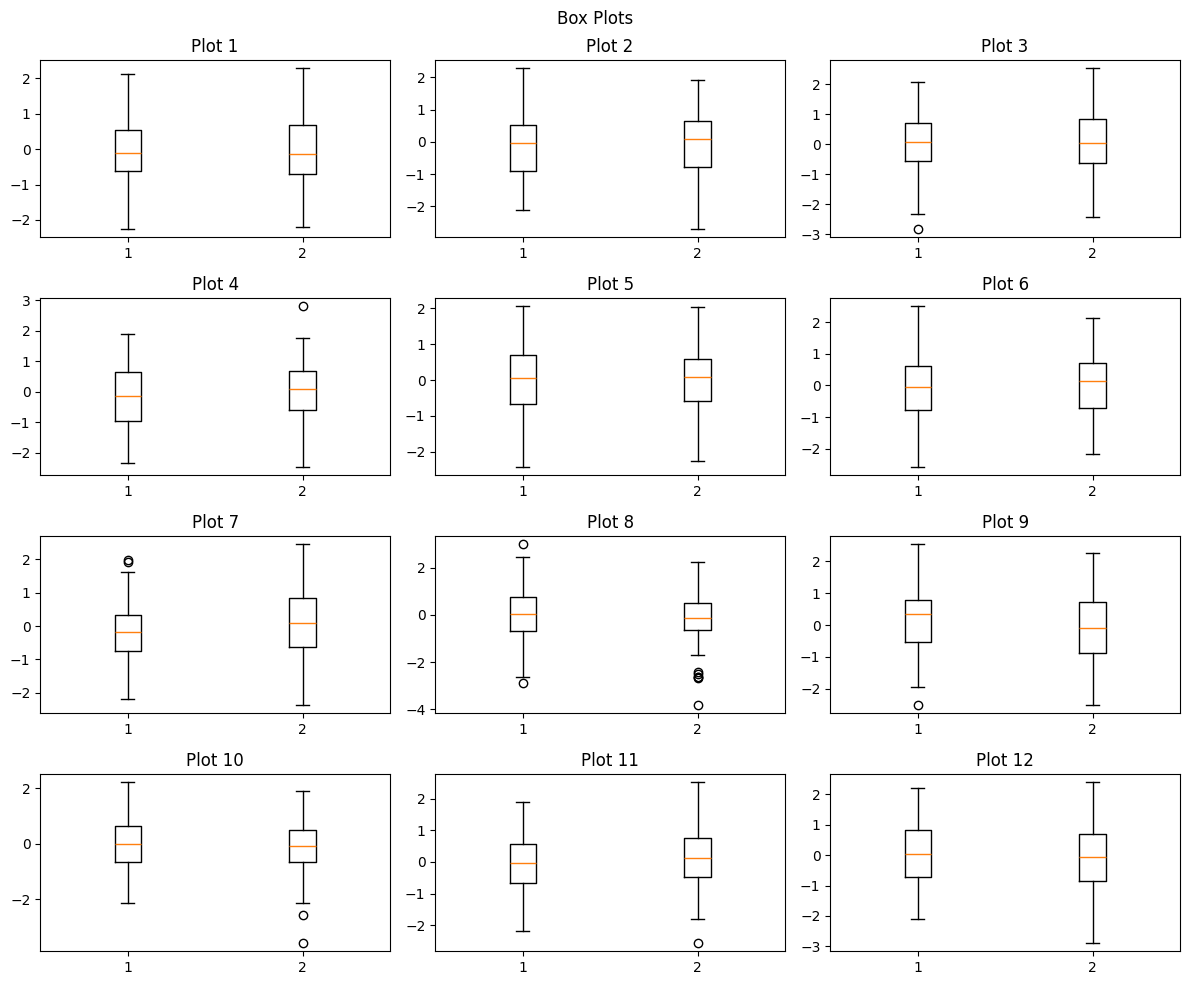

In [6]:
n = 12

dataset = [
    [
        np.random.standard_normal(100),
        np.random.standard_normal(100)
    ]
    for _ in range(n)
]

mp = MultiPlot(dataset, shape=(3, 4), figsize=(12, 10))
mp.dynamic_plot(PlotFunctions.boxplot)

plt.suptitle("Box Plots")
plt.tight_layout()
plt.show()

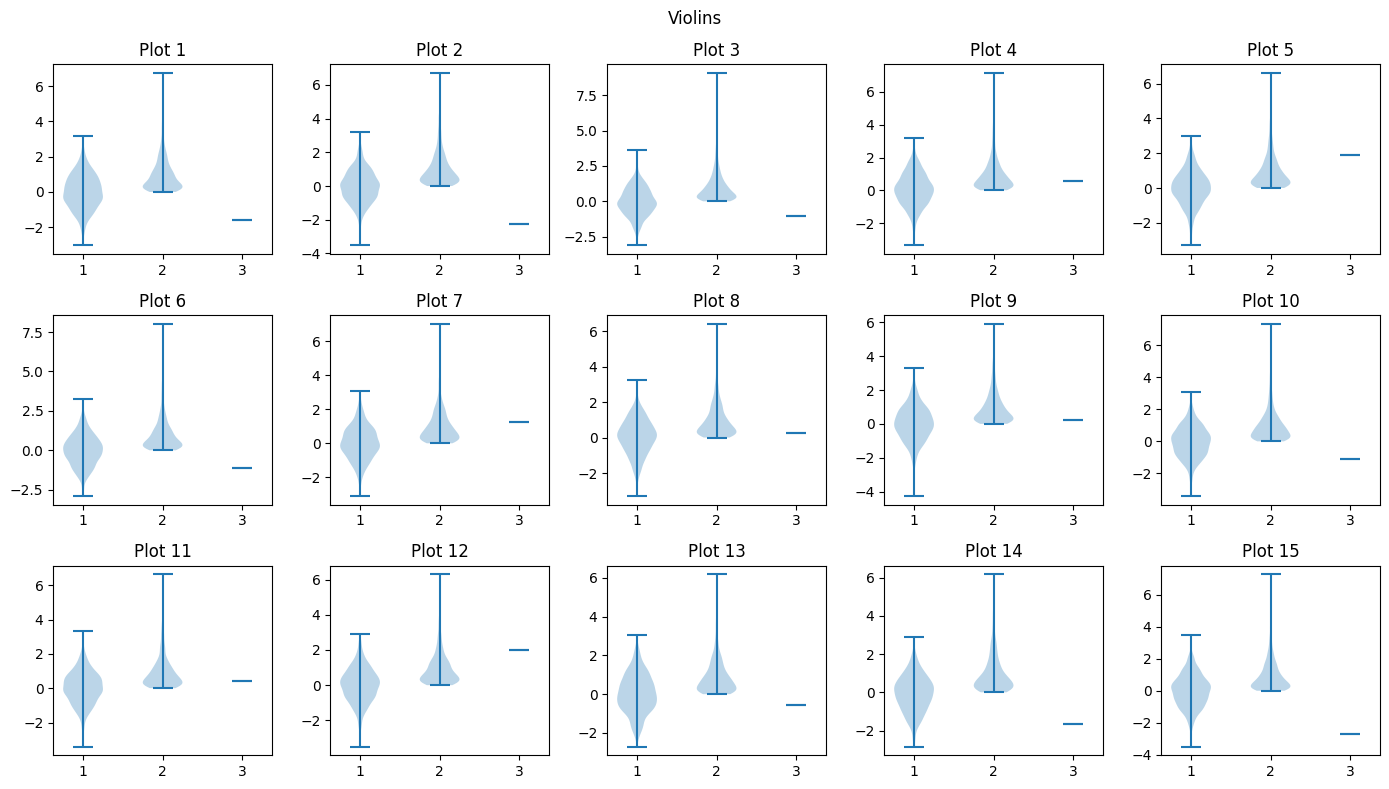

In [7]:
n = 15

dataset = [
    [
        np.random.standard_normal(1_000),
        np.random.standard_exponential(1_000),
        np.random.standard_t(1_000)
    ]
    for _ in range(n)
]

mp = MultiPlot(dataset, perfect_shape=True, long=False, figsize=(14, 8))
fig, axes = mp.dynamic_plot(PlotFunctions.violinplot)

fig.suptitle("Violins")
[ax.axis("tight") for ax in axes]

plt.tight_layout()
plt.show()

## Using a Custom plot function

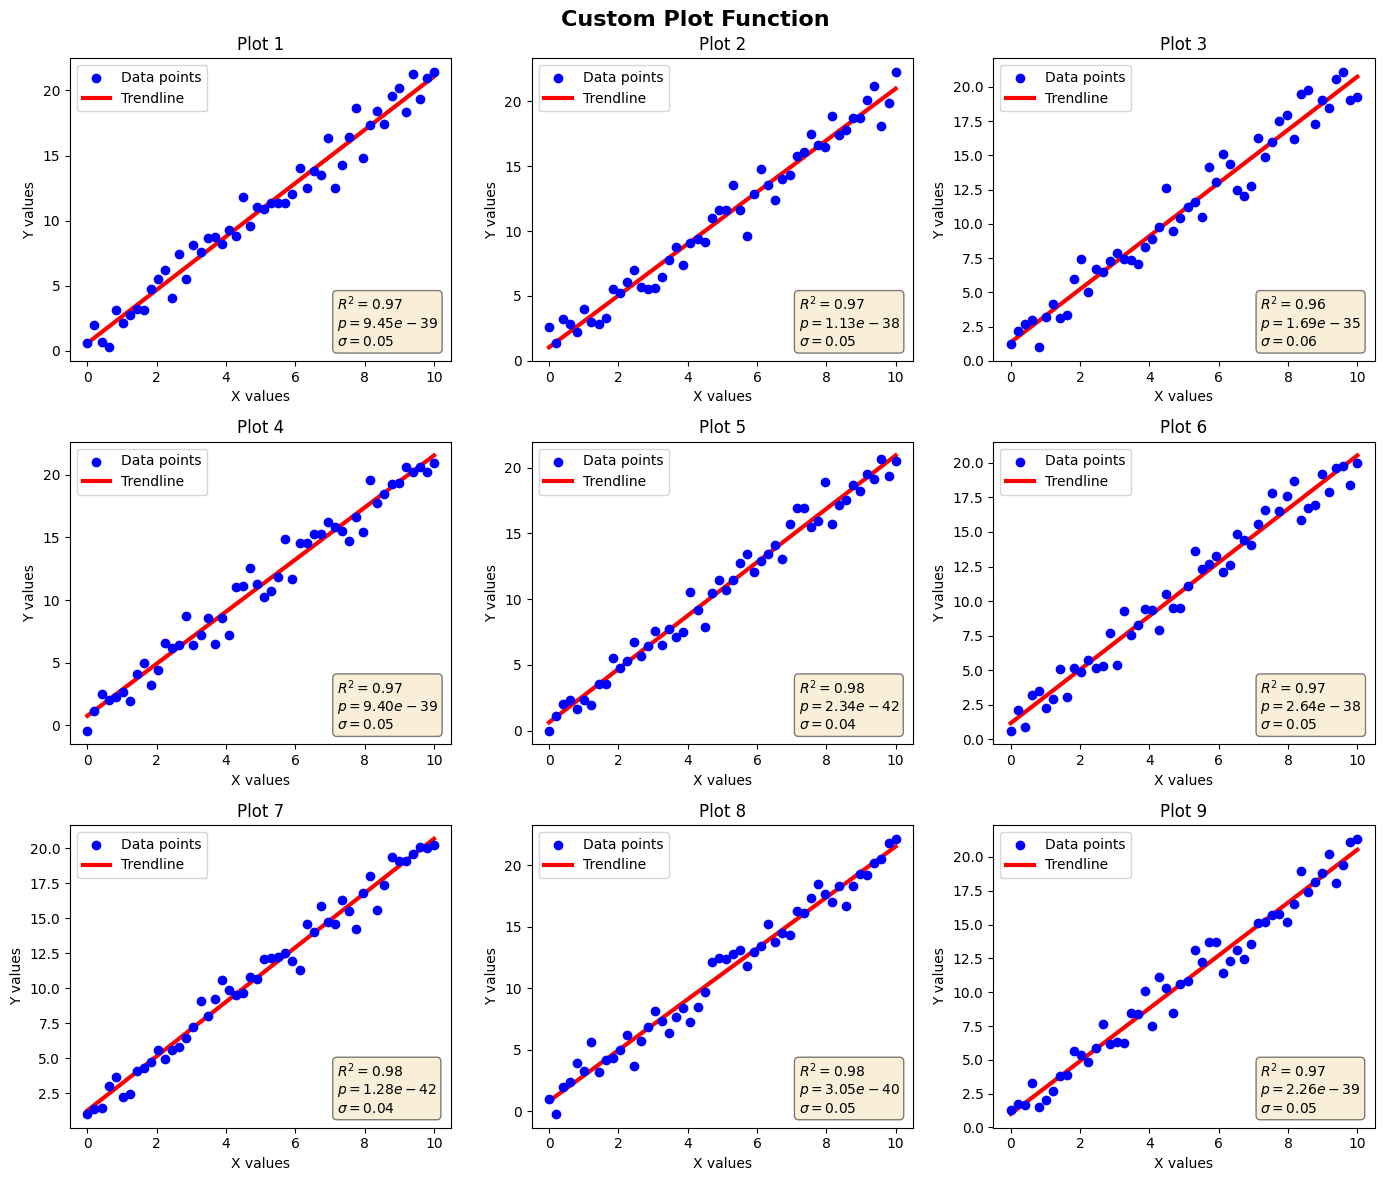

In [8]:
from scipy import stats

n = 9

dataset = [
    [
        x := np.linspace(0, 10, 50),
        2 * x + 1 + np.random.normal(size=x.size)
    ]
    for _ in range(n)
]

x1 = np.linspace(0, 10, 50)
y1 = 2 * x1 + 1 + np.random.normal(size=x1.size)


def custom_plot_fn(ax, data):
    x, y = data[0], data[1]

    ax.scatter(x, y, color='b', label='Data points', zorder=2)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    trendline = slope * x + intercept

    ax.plot(x, trendline, color='r', label='Trendline', linewidth=3, zorder=1)

    textstr = '\n'.join((
        f'$R^2={r_value**2:.2f}$',
        f'$p={p_value:.2e}$',
        f'$\\sigma={std_err:.2f}$',
    ))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.7, 0.05, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='baseline', bbox=props)

    ax.set_xlabel('X values')
    ax.set_ylabel('Y values')
    ax.set_title('Scatter Plot with Trendline')
    ax.legend()


mp = MultiPlot(dataset, perfect_shape=True, long=False, figsize=(14, 12))
fig, axes = mp.dynamic_plot(custom_plot_fn)

fig.suptitle("Custom Plot Function", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Some common Errors

In [9]:
n = 6
dataset = [np.random.standard_exponential(10_000) for _ in range(n)]
mp = MultiPlot(dataset, perfect_shape=True, square_shape=True)

ValueError: Can't create perfect square shape figure with given params -> n:6 and nearest_perfect_square:9, dataset must have a perfect square len()

In [10]:
n = 9
dataset = [np.random.standard_exponential(10_000) for _ in range(n)]
mp = MultiPlot(dataset, shape=1)

ValueError: 'shape' must be of type 'tuple' or 'list', you provided <class 'int'>.

In [11]:
n = 9
dataset = [np.random.standard_exponential(10_000) for _ in range(n)]
mp = MultiPlot(dataset, shape=(2, 2, 2))

ValueError: 'shape' must have length = 2, you provided a shape with length = 3.

In [12]:
n = 9
dataset = [np.random.standard_exponential(10_000) for _ in range(n)]
mp = MultiPlot(dataset, perfect_shape=True, figsize=[10, 10])

ValueError: 'figsize' must be of type 'tuple', you provided <class 'list'>.

In [13]:
n = 9
dataset = [np.random.standard_exponential(10_000) for _ in range(n)]
mp = MultiPlot(dataset)

ValueError: If 'perfect_shape' and 'square_shape' are set to False, please provide a custom shape.